# PART A - The optimisation ..

## Portfolio optimization - Mordern / Mean-Variance Portfolio Theory(MPT) and its Quadratic Programing(QP) formulation - 

In this notebook, I will first explain the Mean-Variance Portfolio Theory and its Quadratic Programing(QP) formulation. And then later use python coding to optimise the porfolio given to us in our final coursework for Financial Modelling module.

Mordern portfolio Theory i.e., Mean-Variance Portfolio Theory formulaised by Markowitz in 1952 is a foundational concept in modern finance and porfolio optimisation today. Mean (Return) and Variance (Risk) are two major factors in the implemnation of this theory. It works by constructing a portfolio that aims to maximize return for a given level of risk, or equivalently, minimize risk for a given level of return.

**Definations and inputs -**

In order to use the mean-variance model for portfolio construction, one must obtain estimates of the return, variance and covariance for each asset in portfolio.

1) Expected Retuns - The expected return of an asset is the average return it is anticipated to generate over a certain period. So an input of an array of returns, where each component i of this array is the expected return to the asset i in the considered horizon: r = (r1 , r2 ,..., rn )

2) Variance and Covariance - Variance measures the dispersion of asset returns around their mean. This is a measure of the risk the asset poses. Covariance indicates how two assets move together. A positive covariance means the assets tend to move in the same direction, while a negative covariance means they move inversely.

<div>
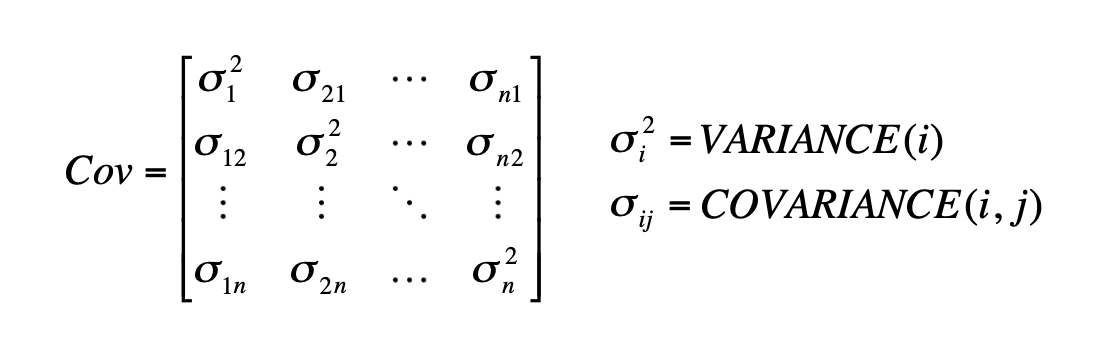
    
    The covariance matrix is a symmetric matrix where each element σ(i,j) epresents the covariance between assets i and j. σ(i,i)(diagonal elements) represents the variance of asset i and σ(i,j) = σ(j,i)(off-diagonal elements) represents the covariance between asset i and asset j.
    
    
</div>

3) Weights - Array(vector) of weights for each asset in the portfolio: 

W = (w1, w2, w3 ....wn)

4) Portfolio Return and Portfolio Variance - 

Expected porfolio return is the sum of mean of indvidual asset return multiplied by asset's weight.

<div>
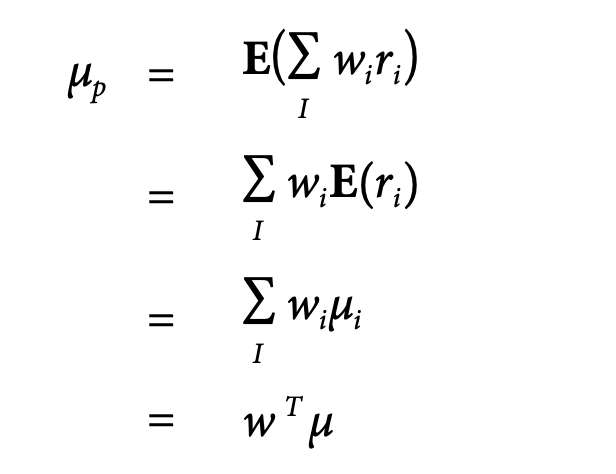
</div>


Here, the ri are the future returns (vector with return values assumed to be normally distributed) and μi is the expected return for instrument i. Finally, wT is the transpose of the weights vector and μ is the vector of the expected security returns.

Given the above porfolio coveriance matrix, following formula provides the formula for the expected portfolio variance.

<div>
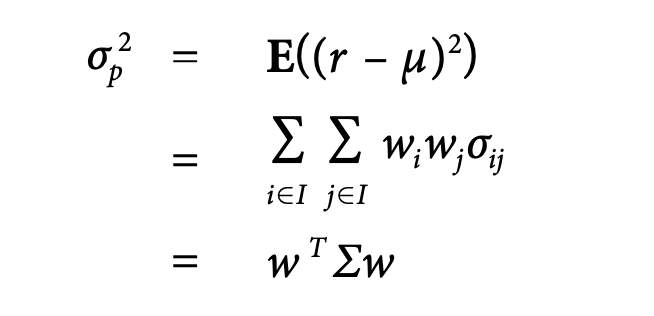
</div>

This formula shows that the portfolio variance is a sum of terms, each of which involves the product of two weights Wi and Wj and the covariance σ(i,)j between the corresponding assets. This is a quadratic function in the weights Wi and Wj. For example for a 2 asset porfolio the formula for variance will be following which is a quadratic and so the quadretic programming can be applied to it.

<div>
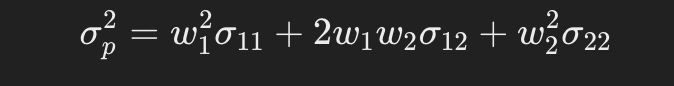
</div>

5) Sharpe Ration - The Sharpe ratio measures the risk-adjusted return of a portfolio. General formula for sharpe ration is 

Sharpe Ratio = (Rx – Rf) / StdDev Rx
Rx = Expected portfolio return. Rf = Risk-free rate of return. StdDev Rx = Standard deviation of portfolio return (or, volatility)

***Formulate the Optimization Problem***

The mean-variance model consists of minimizing portfolio variance(risk), as measured by

$$\frac{1}{2}x^T C x$$

subject to a set of constraints.

the sum of the investment fractions $x_i$'s should add up to a total of one,

$$\sum_{i=1}^n x_i = 1,$$

and, being fractions (or percentages), they should be numbers between zero and one,

$$0 \le x_i \le 1, \;\;\; i = 1 \ldots n.$$


It also involves optimisaising for a maximum return which can presented by following formula - 

<div>
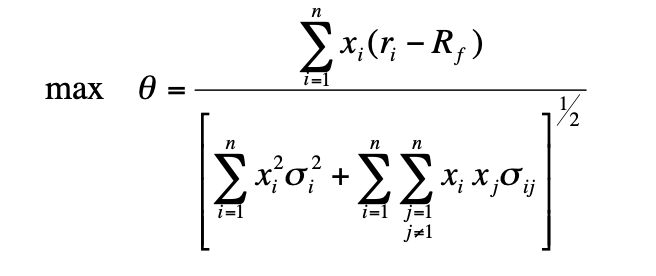
</div>


Efficient Frontier

The set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of return form the Efficient Frontier. Investors should aim to choose portfolios on this frontier. 


***References - ***

Python for Finance, 2nd Edition by Yves Hilpisch 

Markowitz's Mean-Variance Portfolio Theory - https://www.investopedia.com/terms/m/modernportfoliotheory.asp

Quadratic Programming Applied to Modern Portfolio Selection by Fabio Silva Dias - https://linux.ime.usp.br/~cef/mac499-01/monografias/fdias-rec/QP.pdf 

Portfolio Construction & Modern Portfolio Theory - https://ufdcimages.uflib.ufl.edu/AA/00/06/10/50/00001/ooropeza-Report_Final.pdf

Quadratic Programming for Portfolio Optimization - https://www.mathworks.com/help/optim/ug/quadratic-programming-portfolio-optimization-problem-based.html

Why is the variance of a portfolio a quadratic form? - https://quant.stackexchange.com/questions/17636/why-is-the-variance-of-a-portfolio-a-quadratic-form

### Data Preparations ###

The daily price data of assests is downloaded from Bloomberg using Bloomberg terminal at the university.

1) Running the install office add in on the terminal installs the Bloomberg add in excel.

<div>
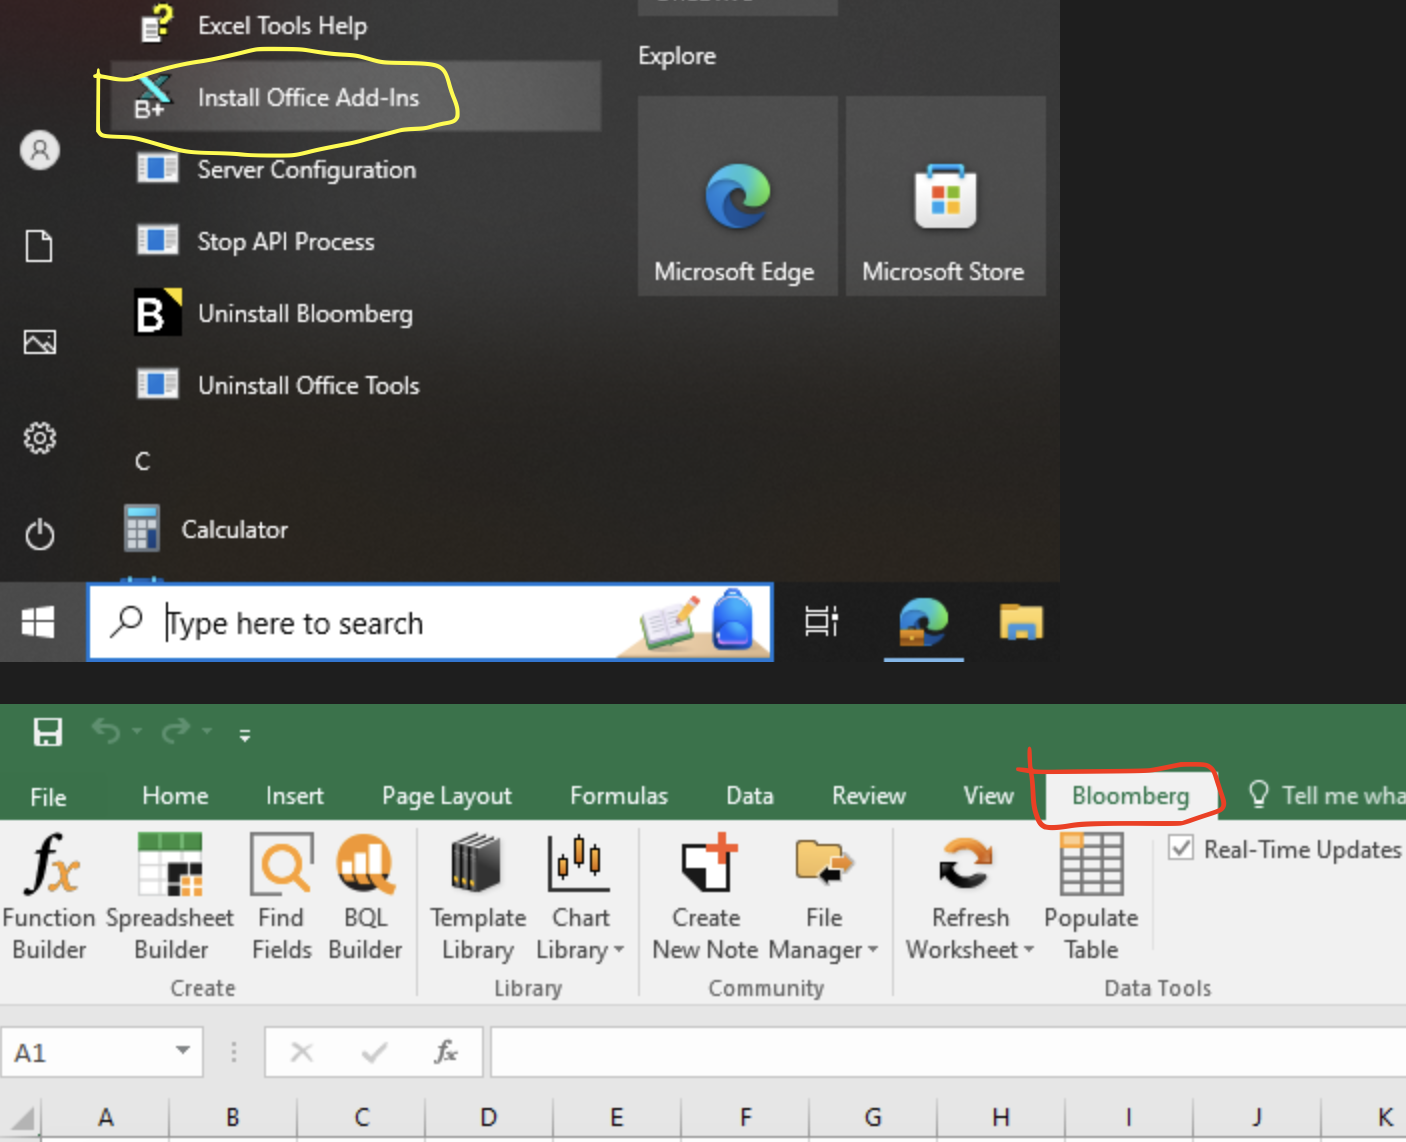
</div>

2) downnload the price history data using the BDH function

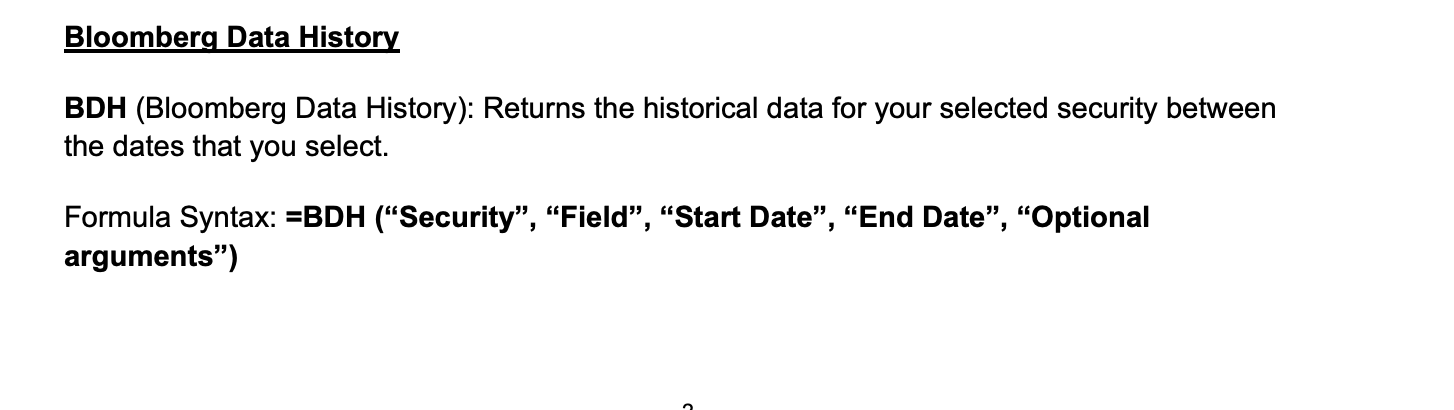

https://www.emich.edu/cob/programs/finance-programs/documents/bloomberg-lab/formula-method-excel.pdf

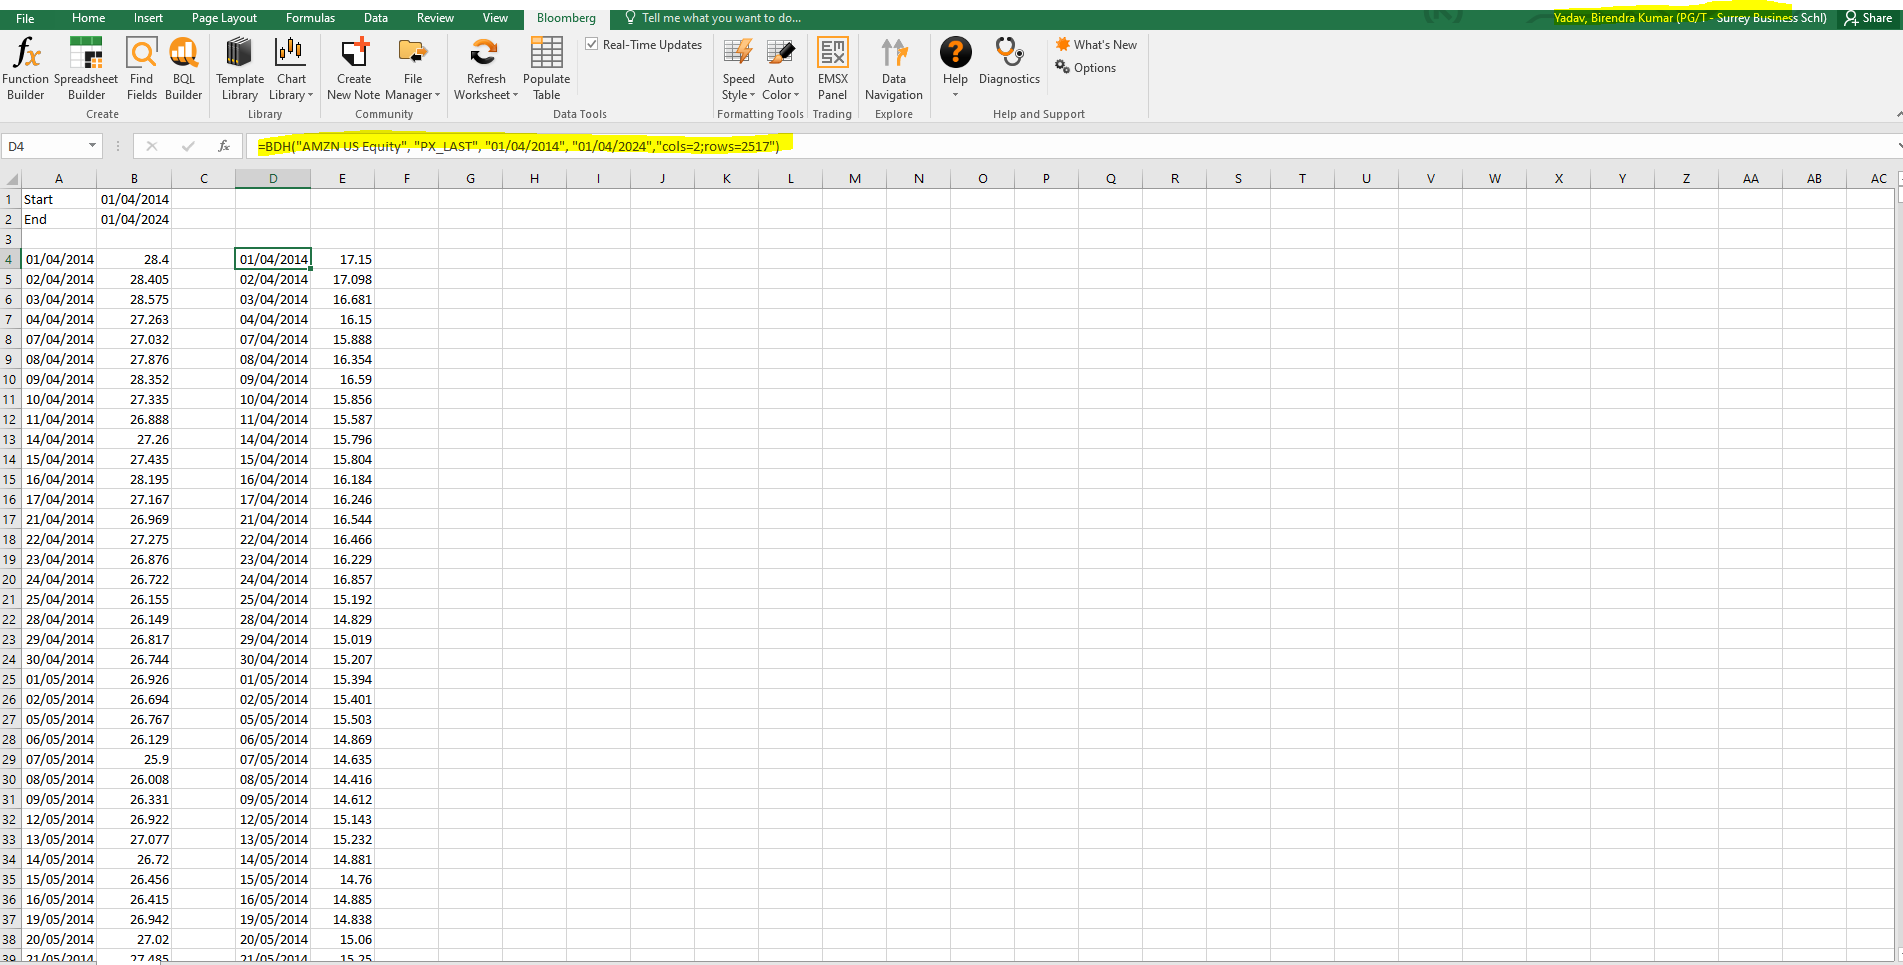

In [1]:
import pandas as pd
import numpy as np
import numpy.random as npr
from scipy.optimize import minimize,fsolve
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

saving_rate = 0.035
risk_free_rate = 0.035

assets = ['GOOGL', 'AMZN', 'TSLA', 'GS','BNDX','DAX_US','Savings_Account'] #list of the assets of the portfolio

raw_data = pd.read_csv('Bloombergdownload.csv',index_col=0, parse_dates=True)
raw_data

,GOOGL,AMZN,TSLA,GS,DAX,BNDX,FXEURUSD
Dates,,,,,,,
2014-04-01,28.400,17.150,14.4647,165.92,9603.71,50.51,1.3793
2014-04-02,28.405,17.098,15.3527,167.27,9623.36,50.45,1.3767
2014-04-03,28.575,16.681,15.0267,166.09,9628.82,50.52,1.3720
2014-04-04,27.263,16.150,14.1483,163.24,9695.77,50.60,1.3705
2014-04-07,27.032,15.888,13.8347,158.56,9510.85,50.65,1.3742
...,...,...,...,...,...,...,...
2024-03-26,150.670,178.300,177.6700,406.18,18384.35,49.09,1.0831
2024-03-27,150.870,179.830,179.8300,415.25,18477.09,49.24,1.0828
2024-03-28,150.930,180.380,175.7900,417.69,18492.49,49.19,1.0789


I will convert the DAX index from Euros to US Dollars in order to ensure that the entire portfolio of securities is in the same currency, the US Dollar. Once this is done, we can drop the original DAX column in Euros as well as the FX rate as they are now no longer needed.

In [2]:
raw_data['DAX_US'] = raw_data['DAX'] * raw_data['FXEURUSD']

raw_data = raw_data.drop('DAX', axis = 1)
raw_data = raw_data.drop('FXEURUSD', axis = 1)
raw_data

,GOOGL,AMZN,TSLA,GS,BNDX,DAX_US
Dates,,,,,,
2014-04-01,28.400,17.150,14.4647,165.92,50.51,13246.397203
2014-04-02,28.405,17.098,15.3527,167.27,50.45,13248.479712
2014-04-03,28.575,16.681,15.0267,166.09,50.52,13210.741040
2014-04-04,27.263,16.150,14.1483,163.24,50.60,13288.052785
2014-04-07,27.032,15.888,13.8347,158.56,50.65,13069.810070
...,...,...,...,...,...,...
2024-03-26,150.670,178.300,177.6700,406.18,49.09,19912.089485
2024-03-27,150.870,179.830,179.8300,415.25,49.24,20006.993052
2024-03-28,150.930,180.380,175.7900,417.69,49.19,19951.547461


In [3]:
daily_log_returns = np.log(raw_data / raw_data.shift(1)).dropna()
daily_log_returns

,GOOGL,AMZN,TSLA,GS,BNDX,DAX_US
Dates,,,,,,
2014-04-02,0.000176,-0.003037,0.059580,0.008104,-0.001189,0.000157
2014-04-03,0.005967,-0.024691,-0.021463,-0.007079,0.001387,-0.002853
2014-04-04,-0.047002,-0.032350,-0.060234,-0.017308,0.001582,0.005835
2014-04-07,-0.008509,-0.016356,-0.022415,-0.029088,0.000988,-0.016560
2014-04-08,0.030745,0.028908,0.037545,-0.012694,-0.000790,0.001883
...,...,...,...,...,...,...
2024-03-26,0.003990,-0.007877,0.028777,0.003058,0.001223,0.006161
2024-03-27,0.001327,0.008544,0.012084,0.022084,0.003051,0.004755
2024-03-28,0.000398,0.003054,-0.022722,0.005859,-0.001016,-0.002775


In [4]:
#Resample return to monthly
log_returns = daily_log_returns.resample(rule="1M").sum()
log_returns

,GOOGL,AMZN,TSLA,GS,BNDX,DAX_US
Dates,,,,,,
2014-04-30,-0.060079,-0.120242,-0.042755,-0.037458,0.006709,0.005301
2014-05-31,0.066502,0.027308,-0.000577,-0.000063,0.006078,0.017925
2014-06-30,0.022520,0.038352,0.144460,0.046639,0.004875,-0.006973
2014-07-31,-0.008795,-0.036945,-0.072370,0.031915,0.003883,-0.066550
2014-08-31,0.004820,0.079915,0.188792,0.035460,0.012133,-0.012814
...,...,...,...,...,...,...
2023-12-31,0.052617,0.039263,0.034390,0.121777,0.002738,0.046306
2024-01-31,0.002931,0.021229,-0.282704,-0.004573,-0.005790,-0.011183
2024-02-29,-0.011775,0.130078,0.075015,0.013039,-0.007157,0.043593


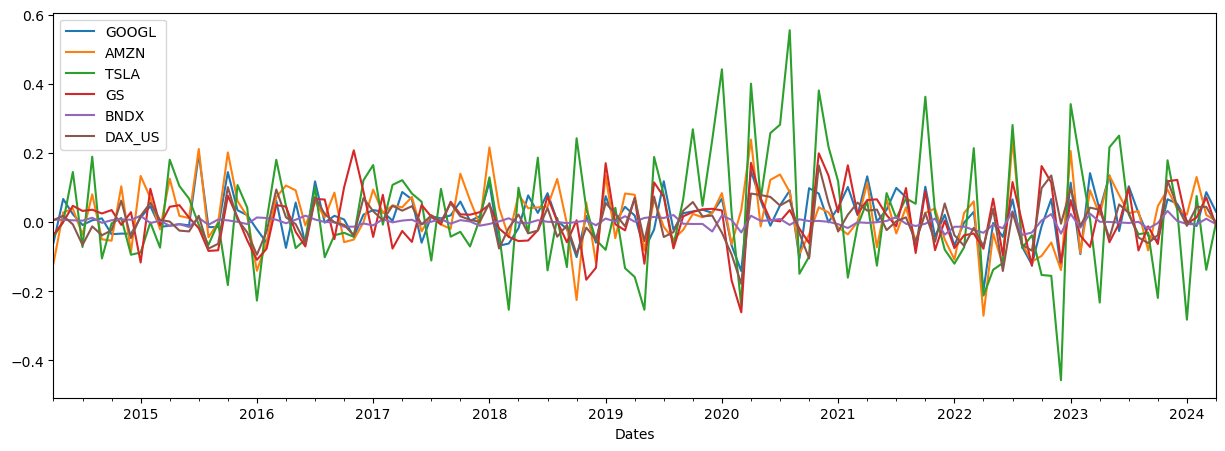

In [5]:
log_returns.plot(figsize=(15,5))
plt.show()

From the below histogram we can see that the return data is ***normally distributed.***

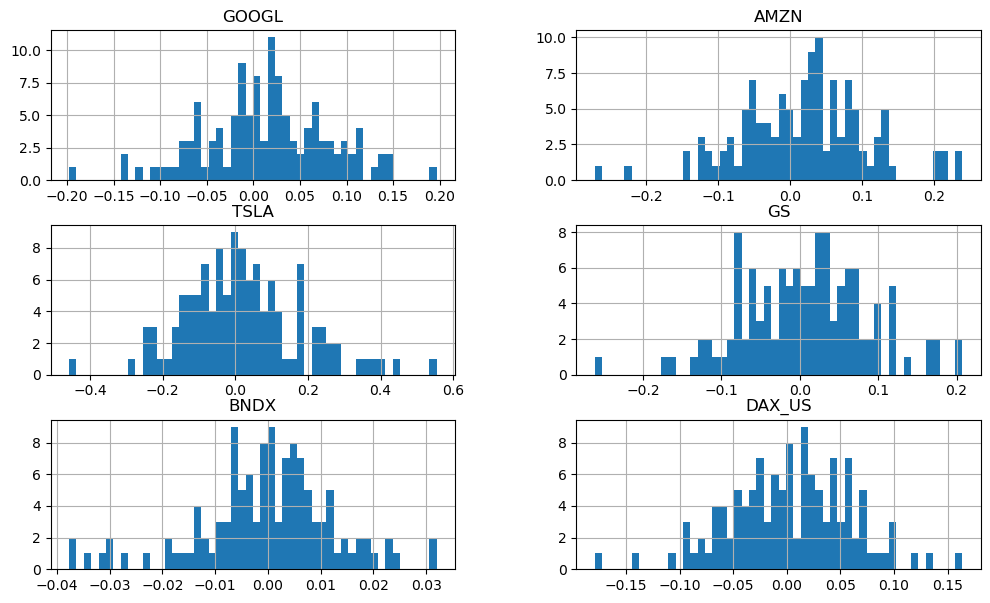

In [6]:
log_returns.hist(bins=50, figsize=(12, 7))
plt.show()

In [7]:
cov_matrix = log_returns.cov() * 12
cov_matrix

,GOOGL,AMZN,TSLA,GS,BNDX,DAX_US
GOOGL,0.053958,0.045304,0.047939,0.030008,0.004182,0.023952
AMZN,0.045304,0.092746,0.075446,0.022211,0.005253,0.027256
TSLA,0.047939,0.075446,0.318948,0.047315,0.004760,0.036428
GS,0.030008,0.022211,0.047315,0.076638,0.002262,0.035085
BNDX,0.004182,0.005253,0.004760,0.002262,0.001984,0.002724
DAX_US,0.023952,0.027256,0.036428,0.035085,0.002724,0.037751


***Portfolio return and Portfolio variance/volatility*** - 
I will the use asset return data and coveriance martix for these calculation as mentioned in the MPT explanation above.

portfolio_return - it takes weight of assests and asset return data as input and returns the portfolio return as output. 
portfolio_volatility - it takes weight of assests and covariance matrix as input and returns the portfolio standard deviation as output. 

In [8]:
def portfolio_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights[0:6])*12 + weights[6]*saving_rate

def portfolio_volatility(weights, cov_matrix):
    variance = np.dot(weights[0:6].T, np.dot(cov_matrix, weights[0:6]))
    return np.sqrt(variance)

This mainly completes the tool set for mean-variance portfolio selection. Of paramount interest to investors is what risk-return profiles are possible for a given set of financial instruments, and their statistical characteristics. To this end, the following implements a Monte Carlo simulation to generate random portfolio weight vectors on a larger scale. For every simulated allocation, the code records the resulting expected portfolio return and variance. 

In [9]:
#Random Portfolio generation using Monte Carlo Simulations 
port_rets = []
port_vols = []
for p in range (1000): #Monte Carlo simulation of portfolio weights
    weights = np.random.random(len(assets))
    weights /= np.sum(weights)  # Normalize the weights to sum to 1
    port_rets.append(portfolio_return(weights,log_returns))
    port_vols.append(portfolio_volatility(weights,cov_matrix))
port_rets = np.array(port_rets)
port_vols = np.array(port_vols)

***A little bit of Monte Carlo simulation? why note!... It is also everywhere in mordern financial estimation or prediction models**

Following graph illustrates the results of the Monte Carlo simulation. This graph shows not all weight distributions perform well when measured in terms of mean and volatility. one is generally interested in the maximum return given a fixed risk level or the minimum risk given a fixed return expectation. This set of portfolios then makes up the so-called efficient frontier. This is derived later in this notebook.

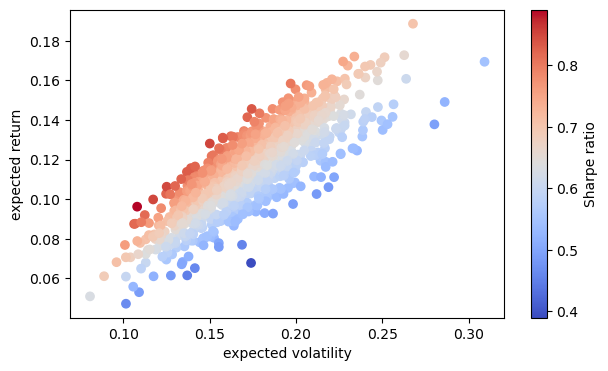

In [10]:
plt.figure(figsize=(7, 4))
plt.scatter(port_vols, port_rets, c=port_rets / port_vols, marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

### Optimisations 

For the optimisation we will use the minimization function from scipy library. This function is quite general and allows for equality constraints, inequality constraints, and numerical bounds for the parameters.

***scipy.optimize.minimize***

It can take input parameters an objective function 'fun' that needs to minimized and 'x0' an array of Initial guess and can return the minimised value of 'fun' and x the solution array and other important informations 

Parameters:
fun: callable - The objective function to be minimized. -> fun(x, *args) -> float

where x is a 1-D array with shape (n,) and args is a tuple of the fixed parameters needed to completely specify the function.

x0 - ndarray, shape (n,) - Initial guess. Array of real elements of size (n,), where n is the number of independent variables.

args - tuple, optional
Extra arguments passed to the objective function and its derivatives (fun, jac and hess functions).

Outputs/Results:

***x, ndarray - The solution of the optimization.***

success, bool - Whether or not the optimizer exited successfully.

status, int - Termination status of the optimizer. Its value depends on the underlying solver. Refer to message for details.

message, str - Description of the cause of the termination.

Reference -
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html#scipy.optimize.OptimizeResult

***The maximization of the Sharpe ratio*** -  The negative value of the Sharpe ratio is minimized to derive at the maximum value and the optimal portfolio composition. The constraint is that all parameters (weights) add up to 1. This can be formulated as follows using the conventions of the minimize() function. The parameter values (weights) are also bound to be between 0 and 1. These values are provided to the minimization function as a tuple of tuples.

minz_sharpe_ratio - Takes weights, log_returns, cov_matrix, risk_free_rate as input and returns the negative value of sharpe ratio.

In [11]:
def minz_sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    return -((portfolio_return(weights, log_returns)-risk_free_rate) / portfolio_volatility(weights, cov_matrix)) 

cons = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1 }
bnds = tuple((0, 1) for I in range(len(assets)))

initial_weights = np.array([1/(len(assets))]*(len(assets)))
initial_weights

array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.14285714])

In [12]:
#Maximize the sharpe ratio with the eqully distributted initial_weights
opts = minimize(minz_sharpe_ratio, initial_weights, args=(log_returns, cov_matrix, risk_free_rate), method='SLSQP', constraints=cons, bounds=bnds)
opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.6879904722414394
       x: [ 3.898e-01  5.278e-01  5.291e-02  1.735e-18  6.516e-17
            2.526e-17  2.946e-02]
     nit: 7
     jac: [-1.431e-01 -1.431e-01 -1.441e-01 -7.201e-02  6.689e-02
            1.309e-01 -1.432e-01]
    nfev: 56
    njev: 7

In [13]:
(lambda x: np.sum(x) - 1)(initial_weights).round(1) # checking if the constraint passed to the minimization() was correct

-0.0

In [14]:
optimal_weights = opts.x
for ticker, weight in zip(assets, optimal_weights):
    print(f"{ticker}: {weight:.4f}")
    
#print("Saving account:", round(optimal_weights[6],4))

optimal_portfolio_return = portfolio_return(optimal_weights, log_returns)
optimal_portfolio_volatility = portfolio_volatility(optimal_weights, cov_matrix)

print(f"Expected Annual Return: {optimal_portfolio_return:.4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}")


GOOGL: 0.3898
AMZN: 0.5278
TSLA: 0.0529
GS: 0.0000
BNDX: 0.0000
DAX_US: 0.0000
Savings_Account: 0.0295
Expected Annual Return: 0.2032
Expected Volatility: 0.2445


Above is the optimised weight of the assets for maximum sharpe ratio i.e., return. Optimisation tells us to invest in only 4 asests GOOGL, AMZN, TSLA and saving account for maximum return. Plotting this optimised weights as a bar graph for visaul illustration.

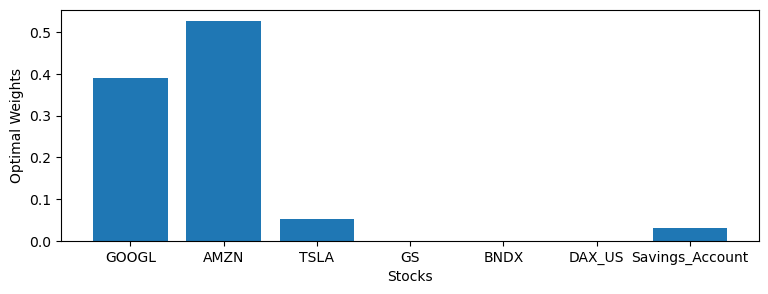

In [15]:
plt.figure(figsize=(9, 3))
plt.bar(assets, optimal_weights)
plt.xlabel('Stocks')
plt.ylabel('Optimal Weights')
plt.show()

***Next, the minimization of the variance of the portfolio. This is the same as minimizing the volatility as volatility is square root of variance.***

In [16]:
optv = minimize(portfolio_volatility, initial_weights, args=(cov_matrix), method='SLSQP', constraints=cons, bounds=bnds)
optv

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 8.57920307130316e-18
       x: [ 0.000e+00  0.000e+00  0.000e+00  6.636e-18  5.551e-17
            3.175e-17  1.000e+00]
     nit: 7
     jac: [ 2.323e-01  3.045e-01  5.648e-01  2.768e-01  4.455e-02
            1.943e-01 -0.000e+00]
    nfev: 56
    njev: 7

In [17]:
optimal_weights = optv.x
for ticker, weight in zip(assets, optimal_weights):
    print(f"{ticker}: {weight:.4f}")

optimal_portfolio_return = portfolio_return(optimal_weights, log_returns)
optimal_portfolio_volatility = portfolio_volatility(optimal_weights, cov_matrix)

print(f"Expected Annual Return: {optimal_portfolio_return:.4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}")


GOOGL: 0.0000
AMZN: 0.0000
TSLA: 0.0000
GS: 0.0000
BNDX: 0.0000
DAX_US: 0.0000
Savings_Account: 1.0000
Expected Annual Return: 0.0350
Expected Volatility: 0.0000


Above is the optimised weight of the assets for minimised volatility. The optimisation tells us that by investing 100% in the saving account which does not have risk(variance) we can minimise the risk of the portfolio, which makes perfect sense. Plotting this optimised weights as a bar graph for visaul illustration.

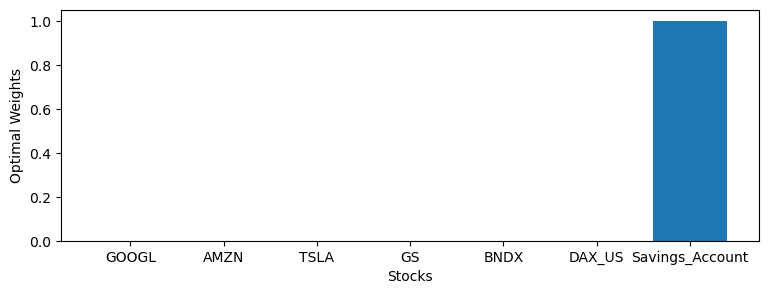

In [18]:
plt.figure(figsize=(9, 3))
plt.bar(assets, optimal_weights)
plt.xlabel('Stocks')
plt.ylabel('Optimal Weights')
plt.show()

This time, the portfolio is made up of only one financial instruments. This portfolio mix leads to the so-called minimum volatility or minimum variance portfolio.

### Efficient frontier

The derivation of all optimal portfolios—i.e., all portfolios with minimum volatility for a given target return level (or all portfolios with maximum return for a given risk level)—is similar to the previous optimizations. The only difference is that one has to iterate over multiple starting conditions. The approach taken is to fix a target return level and to derive for each such level those portfolio weights that lead to the minimum volatility value.

For the optimization, this leads to two conditions: one for the target return level, tret, and one for the sum of the portfolio weights as before.

The boundary values for each parameter stay the same. When iterating over different target return, one condition for the minimization changes. That is why the constraints dictionary is updated during every loop.

In [19]:
cons = ({'type': 'eq', 'fun': lambda x: portfolio_return(x, log_returns) - target_return},
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

bnds = tuple((0, 1) for x in weights)

target_returns = np.linspace(0.02, 0.25, 50) #generate 50 evenly distrubtted return values between 2% to 30%
volatilities = []

for target_return in target_returns:
    res = minimize(portfolio_volatility, initial_weights, args=(cov_matrix,),method='SLSQP', bounds=bnds, constraints=cons)
    #print(res)
    volatilities.append(res['fun'])
volatilities = np.array(volatilities)

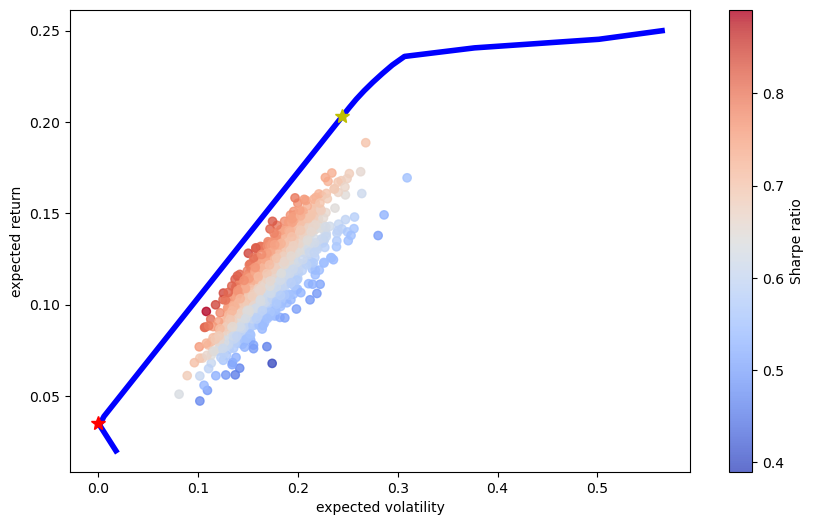

In [20]:
plt.figure(figsize=(10, 6))

#Plot all the porfolios generated for random weights
plt.scatter(port_vols, port_rets, c=port_rets/ port_vols, marker='o', alpha=0.8, cmap='coolwarm')

#Efficient frontier. Plot all the portfolios generated with minimum volatility for given return. genertaed in last code block
plt.plot(volatilities, target_returns, 'b', lw=4.0)

#For the maximum share ratio
plt.plot(portfolio_volatility(opts['x'],cov_matrix), portfolio_return(opts['x'],log_returns),'y*', markersize=10.0)
#For minimum volatility
plt.plot(portfolio_volatility(optv['x'],cov_matrix), portfolio_return(optv['x'],log_returns),'r*', markersize=10.0)

plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

The thick line indicates the optimal portfolios given a certain target return which is the efficient frontier; the dots are, as before, the random portfolios. In addition, the figure shows two larger stars, one for the minimum volatility/variance portfolio (the leftmost portfolio) and one for the portfolio with the maxi‐ mum Sharpe ratio.

### Capital Market Line

Capital Market Line extends the efficient frontier in the context of a risk-free asset. It represents the risk-return trade-off for efficient portfolios, including combinations of a risk-free asset and the market portfolio. The CML is constructed by combining the risk-free asset with the market portfolio.
Portfolios that lie on the CML are considered efficient because they provide the best possible risk-return trade-off. Any portfolio not on the CML is suboptimal, offering lower returns for the same risk level or higher risk for the same return level.

It gives the one portfolio where the tangent line of the efficient frontier goes exactly through the risk-return point of the riskless portfolio. For example, in our case  the riskless interest rate is 0.035. The portfolio is to be found on the efficient frontier for which the tangent goes through the point (0, 0.035) in risk-return space.

In [21]:
import scipy.interpolate as sci

ind = np.argmin(volatilities)
evols = volatilities[ind:]
erets = target_returns[ind:]

#(evols,erets)
#volatilities[

tck = sci.splrep(evols,erets)

def f(x):
    ''' Efficient frontier function (splines approximation). '''
    return sci.splev(x, tck, der=0)
 
def df(x):
    ''' First derivative of efficient frontier function. '''
    return sci.splev(x, tck, der=1)

In [22]:
def equations(p, rf=0.035):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

opt = fsolve(equations, [0.035, 0.5, 0.15])

In [23]:
opt

array([0.035     , 0.68799028, 0.15140154])

In [24]:
np.round(equations(opt), 6)

array([ 0., -0.,  0.])

Following graph presents the results graphically; the star represents the optimal portfolio from the efficient frontier for which the tangent line passes through the riskless asset point 

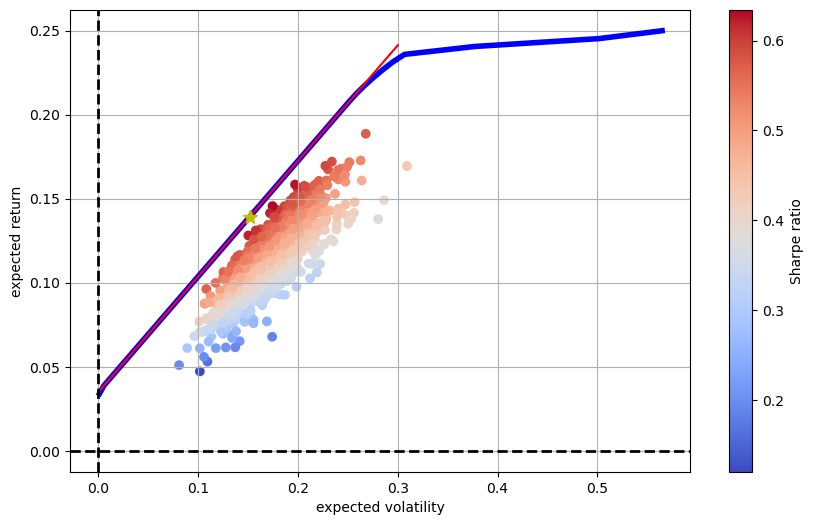

In [25]:
plt.figure(figsize=(10, 6))

#Plot all the porfolios generated for random weights
plt.scatter(port_vols, port_rets, c=(port_rets-risk_free_rate)/ port_vols, marker='o', cmap='coolwarm')

plt.plot(evols, erets, 'b', lw=4.0)
#plt.plot(volatilities, target_returns, 'b', lw=4.0)

cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, 'r', lw=1.5)
plt.plot(opt[2], f(opt[2]), 'y*', markersize=10.0)

plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [26]:
cons = ({'type': 'eq', 'fun': lambda x: portfolio_return(x,log_returns) - f(opt[2])},
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

res = minimize(portfolio_volatility, initial_weights, args=(cov_matrix), method='SLSQP',bounds=bnds, constraints=cons)
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.15140156728640283
       x: [ 2.411e-01  3.265e-01  3.332e-02  0.000e+00  0.000e+00
            0.000e+00  3.991e-01]
     nit: 10
     jac: [ 1.942e-01  2.888e-01  3.092e-01  1.061e-01  1.904e-02
            1.049e-01  0.000e+00]
    nfev: 80
    njev: 10

In [27]:
final_optimal_weights = res.x

print("FInal Optimal Weights:")
for ticker, weight in zip(assets, final_optimal_weights):
    print(f"{ticker}: {weight:.4f}")
    
#print("Saving account:", round(optimal_weights[6],4))

optimal_portfolio_return = portfolio_return(final_optimal_weights, log_returns)
optimal_portfolio_volatility = portfolio_volatility(final_optimal_weights, cov_matrix)

print(f"Expected Annual Return: {optimal_portfolio_return:.4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}")

FInal Optimal Weights:
GOOGL: 0.2411
AMZN: 0.3265
TSLA: 0.0333
GS: 0.0000
BNDX: 0.0000
DAX_US: 0.0000
Savings_Account: 0.3991
Expected Annual Return: 0.1392
Expected Volatility: 0.1514


### Conclusion -

After plotting the efficient frontier is comprised of all optimal portfolios with a higher return than the absolute minimum variance portfolio. These portfolios dominate all other portfolios in terms of expected returns given a certain risk level and solving for the captial market line we get the above optimal weights.
So the optimal porfolio includes only 4 of the 7 assets with the above weights. I have plotted on final bar graph for visual represention of the weights below.

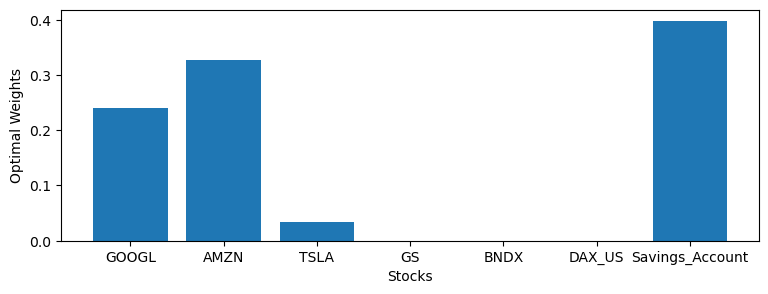

In [28]:
plt.figure(figsize=(9, 3))
plt.bar(assets, res.x.round(3))

plt.xlabel('Stocks')
plt.ylabel('Optimal Weights')

plt.show()

# Part B - Value at Risk(VaR) ...

Portfolio risk refers to the potential for financial loss in the value of a portfolio of investments. RiskMetrics is a framework developed by J.P. Morgan in the early 1990s to measure and manage financial risk. It includes methodologies and tools for assessing the risk of a portfolio. The components of RiskMetrics is Value at Risk (VaR). Which estimates the potential loss in value of a portfolio over a given time period for a specified confidence interval.

Before I get into the estimation of VaR of our optimal porfolio, I will talk about following to set the background.

1) ***Why do we need VaR and What VaR means?***
VaR is essential because it provides a quantifiable measure of the potential loss in value of a portfolio over a defined period for a given confidence interval. This helps financial institutions understand and manage their risk exposure by quantifying the maximum expected loss under normal market conditions. For example, consider a stock position, worth 1 million USD today, that has a VaR of 50,000 USD at a confidence level of 99% over a time period of 30 days (one month). This VaR figure says that with a probability of 99% (i.e., in 99 out of 100 cases), the loss to be expected over a period of 30 days will not exceed 50,000 USD. However, it does not say anything about the size of the loss once a loss beyond 50,000 USD occurs—i.e., if the maximum loss is 100,000 or 500,000 USD what the probability of such a specific “higher than VaR loss” is. All it says is that there is a 1% probability that a loss of a minimum of 50,000 USD or higher will occur.

2) ***How to calculate VaR using Monte Carlo simulations?***
Monte Carlo simulation is a method used to calculate VaR by simulating a large number of potential future market scenarios based on the statistical properties of the portfolio's returns. These returns are generated using a defined stochastic process (for example, assume that interest rates follow a random walk) and statistical parameters that drive the process (for example, the mean and variance of the random variable).The RiskMetrics data sets can be used as inputs to this process.

The steps to use Monte Carlo simulations for VaR estimation - 

 a. Define the statistical properties of the returns (mean, variance, etc.).
 
 b. Generate a large number of random samples (simulated returns) from these statistical properties.
 
 c. Recalculate the portfolio value for each sample.
 
 d. Determine the loss distribution from these simulated portfolio values.
 
 e. Identify the VaR as the loss level at the desired confidence interval from the loss distribution

Monte Carlo Simulation often uses Geometric Brownian Motion(GBM) to model the future prices of assets in a portfolio and we are going to make use GBM later for VaR estimation so lets have a brief look at the theory of GBM.

RiskMetrics Technical Document - https://www.msci.com/documents/10199/5915b101-4206-4ba0-aee2-3449d5c7e95a

Value at Risk (VaR): Overview and Benefit Case - https://info.veritasts.com/insights/value-at-risk-var-overview-and-benefit-case

### Geometric Brownian Motion (GBM) ###

I am going to use Geometric Brownian Motion formulation to estimate the VaR here. So before I the get into Value at Risk estimation of our optimised portfolio, let us look at GBM first.

Geometric Brownian Motion (GBM) is a stochastic process and is widely used in finance for modeling stock prices and calculating Value at Risk (VaR). The GBM model assumes that the logarithm of stock prices follows a Brownian motion with drift, leading to log-normal distribution of prices.

The usual model for the time-evolution of an asset price is given by the geometric Brownian motion, represented by the following stochastic differential equation:

\begin{eqnarray*}
dS(t) = \mu S(t) dt + \sigma S(t) dB(t)
\end{eqnarray*}


And taking the exponential of this equation gives us:

\begin{eqnarray*}
S(t) = S(0) \exp \left(\left(\mu - \frac{1}{2}\sigma^2\right)t + \sigma B(t)\right)
\end{eqnarray*}


where:

- S(t) : The price of the financial instrument at time \( t \).

- S(0) : The initial price of the financial instrument at time \( t = 0 \).

- mu : The drift coefficient, representing the expected return or the average rate of growth of the instrument's price over time.

- sigma: The volatility, representing the standard deviation of the instrument's returns.

- t : The length of the time interval in year fractions.

- \( B(t) \): A Wiener process or Brownian motion at time \( t \), representing the stochastic component of the price movement.

- \( \left( \mu - \frac{1}{2} \sigma^2 \right) t \): The deterministic trend component of the model, adjusting the drift by subtracting half the variance to account for the effect of volatility.

- \( \sigma B(t) \): The stochastic component of the model, scaling the Brownian motion by the volatility coefficient \( \sigma \).

In summary, the GBM equation models the price \( S(t) \) as the initial price \( S(0) \) multiplied by an exponential factor that combines both deterministic and stochastic components. The deterministic component (\( \left( \mu - \frac{1}{2} \sigma^2 \right) t \)) represents the predictable trend in the price, while the stochastic component (\( \sigma B(t) \)) represents the random fluctuations around that trend.

Refence -

Geometric Brownian Motion by quantstart - https://www.quantstart.com/articles/Geometric-Brownian-Motion
Brownian Motion / Wiener Process Explained - https://www.youtube.com/watch?v=YZL2xdhh7qE

**For example, following is simulation of a stock price for a stock that follows a Geometric Brownian Motion:**

In [29]:
S0 = 100  # initial price
mu = 0.05  # constant drift
sigma = 0.25  # constant volatility
t = 2 # in years
I = 10000  # number of random draws
ST = S0 * np.exp((mu - 0.5 * sigma ** 2) * t + sigma * np.sqrt(t) * npr.standard_normal(I))

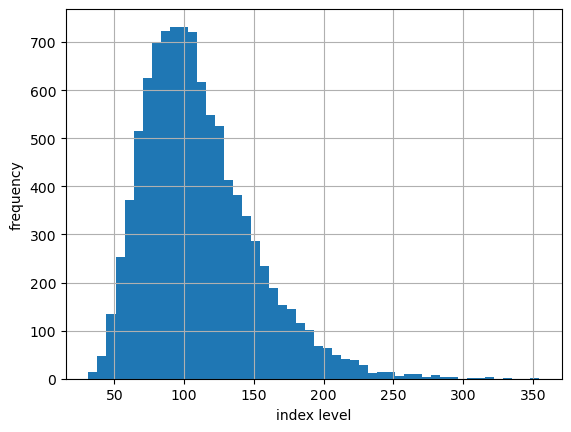

In [30]:
plt.hist(ST, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

### VaR estimation... connection the optimal portfolio calcuation done in the earlier with the VaR estimation.

Following are the code for VaR estimation for my optimsied portfolio. Here we will connect our optimal portfolio We will use the return of my optimal portfolio as 'mu' the drift coefficent, volitiliy of the optimal portfolio as 'sigma' and the optimal weight(final_optimal_weights) that we determined.

In [31]:
#taking optimal_portfolio_return, final_optimal_volitiliy and final_optimal_weights as the weight for the optimised portfolio for VaR calculation
mu = optimal_portfolio_return
sigma = optimal_portfolio_volatility

print(mu,sigma)
S0 = raw_data.iloc[-1].values # Price from last record as Initial prices
S0

0.13916278589662723 0.15140156728640283


array([  155.49    ,   180.97    ,   175.22    ,   413.51    ,
          48.88    , 19866.482007])

In [32]:
T = 1/12  # One month
I = 10000  # Number of simulations
confidence = 95  # Confidence level

In [33]:
# Generate correlated random numbers
L = np.linalg.cholesky(cov_matrix)
z = np.random.standard_normal((6, I))
correlated_z = np.dot(L, z)
correlated_z

array([[-2.84640447e-01,  6.67962058e-01,  1.42851640e-01, ...,
        -2.85069336e-02,  1.45213957e-01, -1.45717186e-01],
       [ 1.05943104e-01,  1.06046102e+00,  6.87798910e-02, ...,
         3.21601774e-01,  8.97722119e-02, -1.15234222e-01],
       [-3.94861303e-01,  8.37538765e-01,  4.34990328e-01, ...,
         2.85191595e-01, -2.86667698e-01,  5.15488284e-01],
       [-2.82386532e-01,  2.47361665e-01,  4.82850695e-01, ...,
        -2.42252781e-02, -4.67203352e-01,  4.06479562e-01],
       [ 5.16508525e-02, -5.74590472e-03, -1.63476399e-02, ...,
         8.24630699e-02,  5.97085940e-02, -8.25199678e-02],
       [-1.80102077e-01,  1.98874548e-01,  1.48698718e-01, ...,
        -7.41537858e-02,  6.52807352e-04, -6.92761194e-02]])

In [34]:
# Simulate end-of-period prices for each asset
ST = S0[:, np.newaxis] * np.exp((mu - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * correlated_z)
ST

array([[  155.21057767,   161.8090732 ,   158.13777917, ...,
          156.95785   ,   158.15410729,   156.15584613],
       [  183.75501025,   191.58305806,   183.45678834, ...,
          185.49519035,   183.62518491,   181.98725504],
       [  174.06457807,   183.69733471,   180.49367839, ...,
          179.31583112,   174.8896256 ,   181.1298156 ],
       [  412.80756782,   422.47684966,   426.84754158, ...,
          417.49171866,   409.48651297,   425.42515659],
       [   49.51459911,    49.39054369,    49.36766348, ...,
           49.58132408,    49.53203976,    49.22509259],
       [19921.59402364, 20254.31328266, 20209.94468349, ...,
        20014.05611064, 20079.59889562, 20018.32321485]])

In [35]:
# Calculate portfolio returns

portfolio_value_T = np.dot(final_optimal_weights[0:6], ST)
initial_portfolio_value = np.sum(S0 * final_optimal_weights[0:6])
portfolio_returns = (portfolio_value_T - initial_portfolio_value)/initial_portfolio_value
print(portfolio_value_T , "\n", initial_portfolio_value,"\n", portfolio_returns)    

[103.21725699 107.68499056 104.03978722 ... 104.38167236 103.91195953
 103.10336496] 
 102.41375479372414 
 [0.00784565 0.05147    0.01587709 ... 0.01921536 0.01462894 0.00673357]


In [36]:
# Calculate Value-at-Risk
VaR = np.percentile(portfolio_returns, 100 - confidence)
VaR

-0.007756667086000676

### Interpretation of VaR value 

The VaR for our portfolio at 95% confidence is .7%. This VaR says that with a probability of 95%, the loss to be expected over a period of 1 month will not exceed 0.7% of the portfolio value.

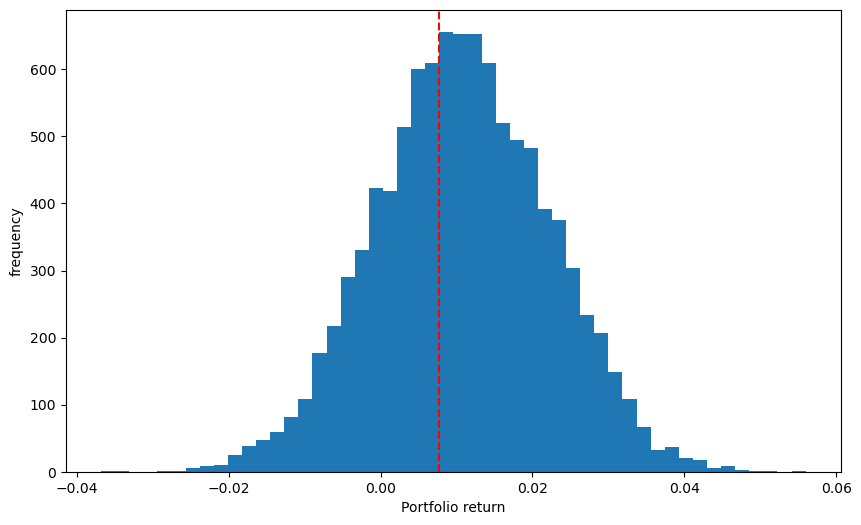

In [37]:
plt.figure(figsize=(10, 6))
plt.hist(portfolio_returns, bins=50)
plt.axvline(x=-VaR, color='r', linestyle='--', label=f'VaR at {confidence}%: {-VaR:.2f}')
plt.xlabel('Portfolio return')
plt.ylabel('frequency');

### VaR estimation with GARCH process 

GARCH stands for Generalized Autoregressive Conditional Heteroskedasticity. It is a statistical model used to estimate the volatility of financial time series data, such as stock prices or returns. The GARCH model is an extension of the ARCH (Autoregressive Conditional Heteroskedasticity) model. Both models account for the fact that financial time series often exhibit periods of high and low volatility clustering together, rather than having constant volatility.

I will use the GARCH process to estimate the volatility and then use this GARCH volatility to estimate the VaR.

Reference -

Week 10 lecture materials

GARCH Process by Investopedia -https://www.investopedia.com/terms/g/generalalizedautogregressiveconditionalheteroskedasticity.asp#:~:text=The%20generalized%20autoregressive%20conditional%20heteroskedasticity%20(GARCH)%20process%20is%20an%20approach,bonds%2C%20and%20other%20investment%20vehicles

In [38]:
#Function to calculate and return the volatility with GARCH and Coveriance matrix with GARCH
from arch import arch_model

def portfolio_volatility_garch(weights):
    forecasted_volatility = pd.DataFrame(index=log_returns.index, columns=assets[0:6])
    
    for asset in assets[0:6]:
        asset_returns = log_returns[asset]
        model = arch_model(asset_returns, vol='Garch', p=1, q=1)
        model_fitted = model.fit(disp="off")
        forecasts = model_fitted.forecast(horizon=1, start=asset_returns.index[0])
        forecasted_volatility[asset] = np.sqrt(forecasts.variance.values.flatten())
    
    # Use the last available forecasted volatilities
    sigma_garch = forecasted_volatility.iloc[-1].values
    
    # Calculate the historical correlation matrix
    correlation_matrix = log_returns.corr()
    
    # Calculate the GARCH-based covariance matrix
    cov_matrix_garch = np.outer(sigma_garch, sigma_garch) * correlation_matrix
    
    # Calculate the portfolio variance
    variance = np.dot(weights[0:6].T, np.dot(cov_matrix_garch, weights[0:6]))
    return np.sqrt(variance), cov_matrix_garch

In [39]:
portfolio_volatility_garch(final_optimal_weights)

(0.04468426372101635,
            GOOGL      AMZN      TSLA        GS      BNDX    DAX_US
 GOOGL   0.006168  0.004137  0.005256  0.002361  0.000363  0.001892
 AMZN    0.004137  0.006766  0.006608  0.001396  0.000364  0.001720
 TSLA    0.005256  0.006608  0.033540  0.003570  0.000396  0.002760
 GS      0.002361  0.001396  0.003570  0.004149  0.000135  0.001907
 BNDX    0.000363  0.000364  0.000396  0.000135  0.000130  0.000163
 DAX_US  0.001892  0.001720  0.002760  0.001907  0.000163  0.002061)

*** Estimating the VaR for my optimised porfolio with portfolio_volatility_garch as sigma and cov_matrix_garch as the coeriance matrix***
All the other values will remamin same.

In [40]:
sigma = portfolio_volatility_garch(final_optimal_weights)[0]
cov_matrix_garch = portfolio_volatility_garch(final_optimal_weights)[1]

L = np.linalg.cholesky(cov_matrix_garch)
correlated_z = np.dot(L, z)

STC = S0[:, np.newaxis] * np.exp((mu - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * correlated_z)

In [41]:
portfolio_value_T = np.dot(final_optimal_weights[0:6], STC)
initial_portfolio_value = np.sum(S0 * final_optimal_weights[0:6])
portfolio_returns = (portfolio_value_T - initial_portfolio_value)/initial_portfolio_value
VaR_garch = np.percentile(portfolio_returns, 100 - confidence)
VaR_garch

0.009962853313446238